## Задание 5

Мы посмотрели как на вклад пользователей, так и вклад постов в общую динамику просмотров и лайков. Однако не менее полезной может оказаться декомпозиция временного ряда на компоненты - чтобы выделить отдельные составляющие части процесса.

Возьмите почасовую динамику активности за весь период и проанализируйте её [этой функцией](https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.STL.html). Соотнесите получившийся результат с его интерпретацией:

<div>
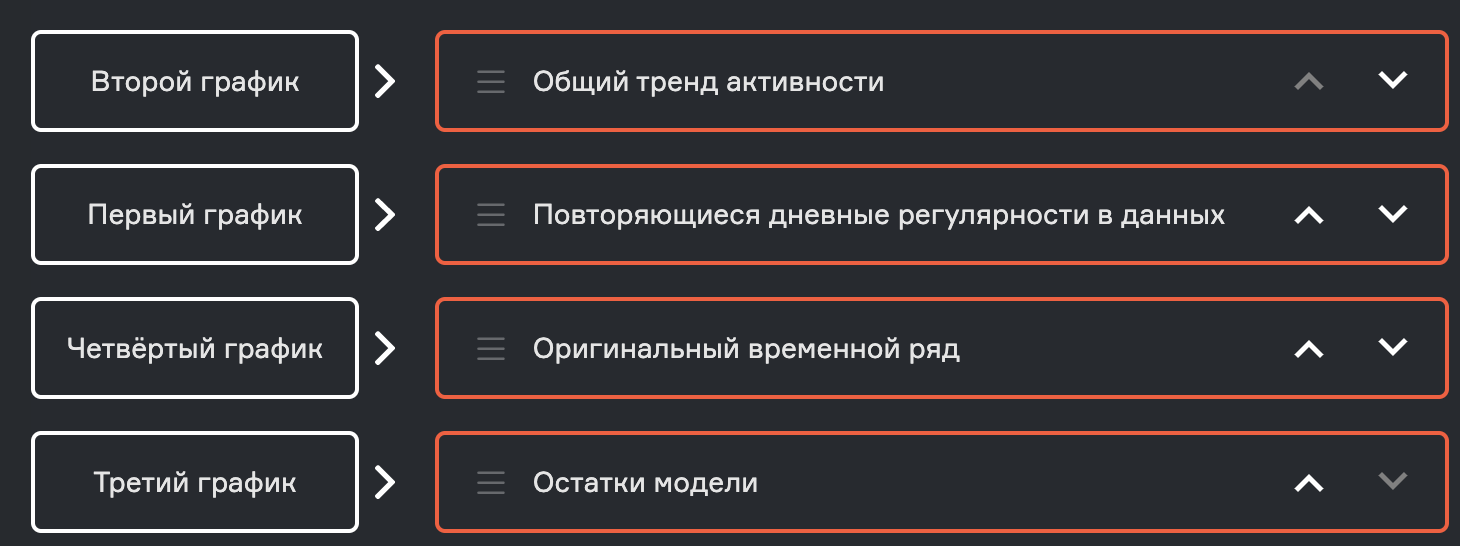
</div>

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

from read_db import Getch

In [35]:
sns.set(rc={'figure.figsize': (12, 9), 'figure.dpi': 300})

In [9]:
query = """
SELECT 
  toStartOfHour(time) time, 
  count(user_id) count_actions
FROM simulator_20220420.feed_actions 
GROUP BY time
ORDER BY time
"""

In [29]:
data = Getch(query).df

In [30]:
data = data.set_index('time')

In [31]:
data.head()

,count_actions
time,
2022-03-08 00:00:00,61
2022-03-08 01:00:00,65
2022-03-08 02:00:00,45
2022-03-08 03:00:00,30
2022-03-08 04:00:00,38


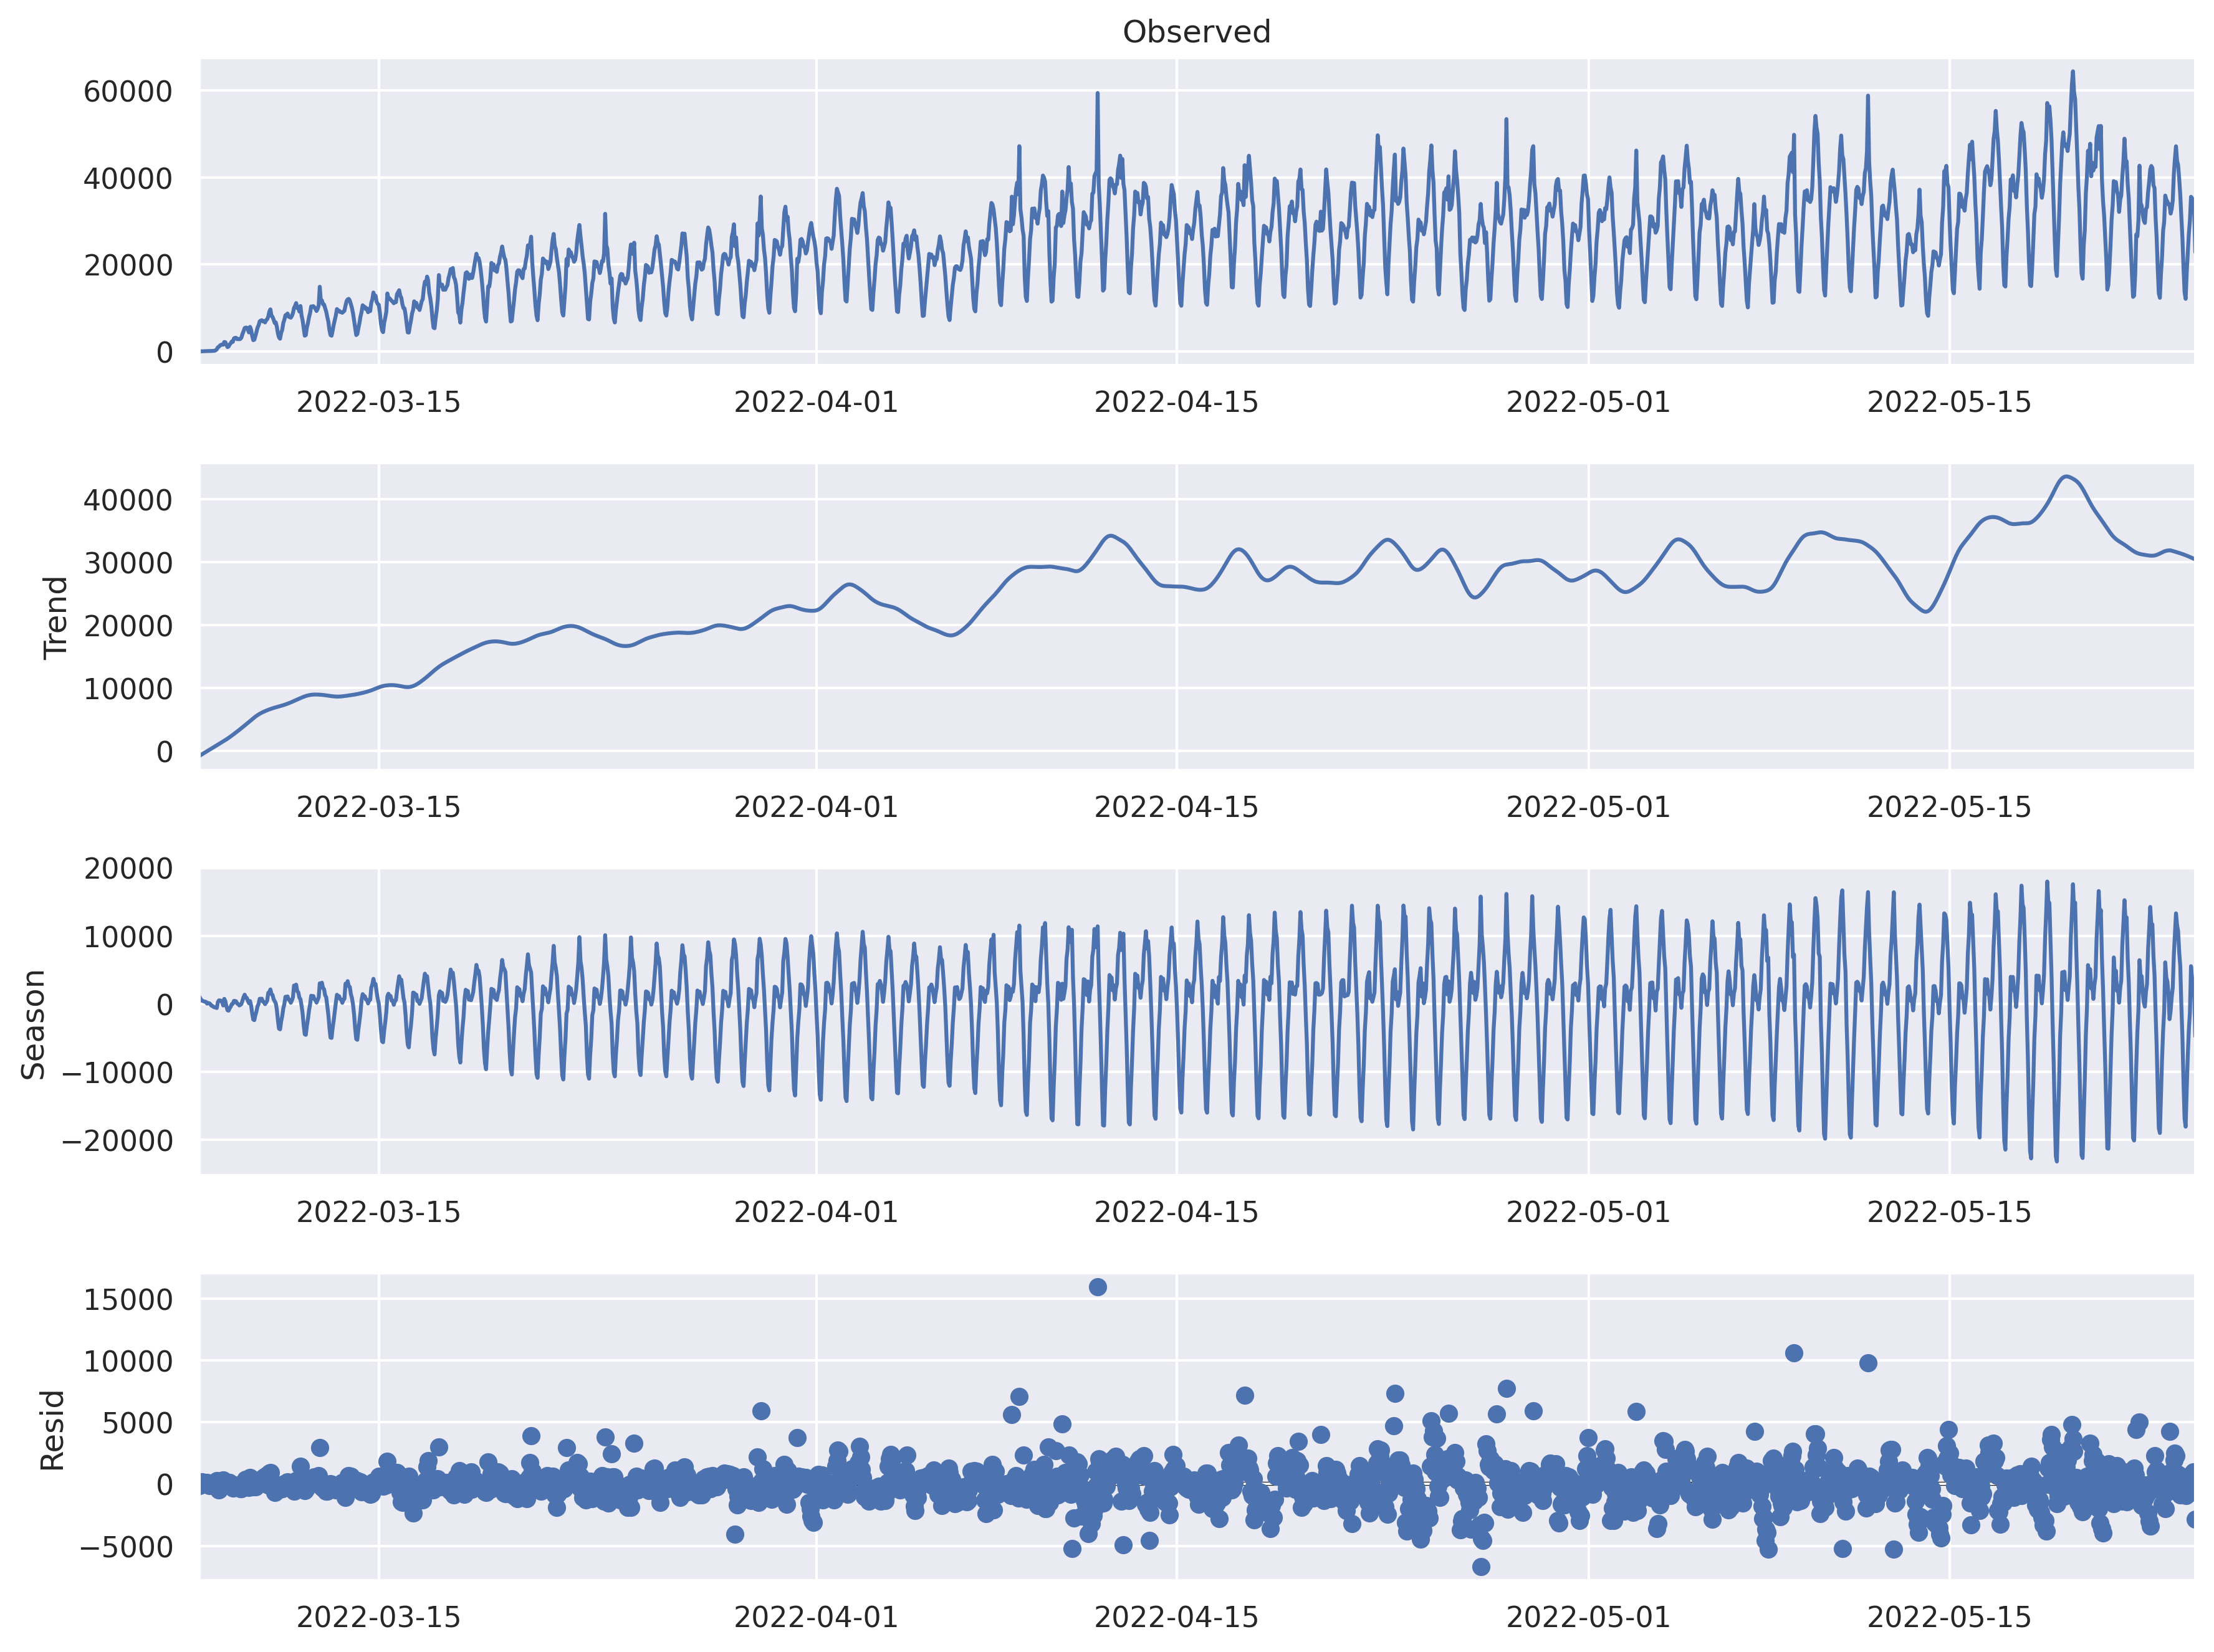

In [36]:
res = STL(data).fit()
res.plot()
plt.show()

In [43]:
se = res.seasonal.iloc[1000:]

<AxesSubplot:xlabel='time', ylabel='season'>

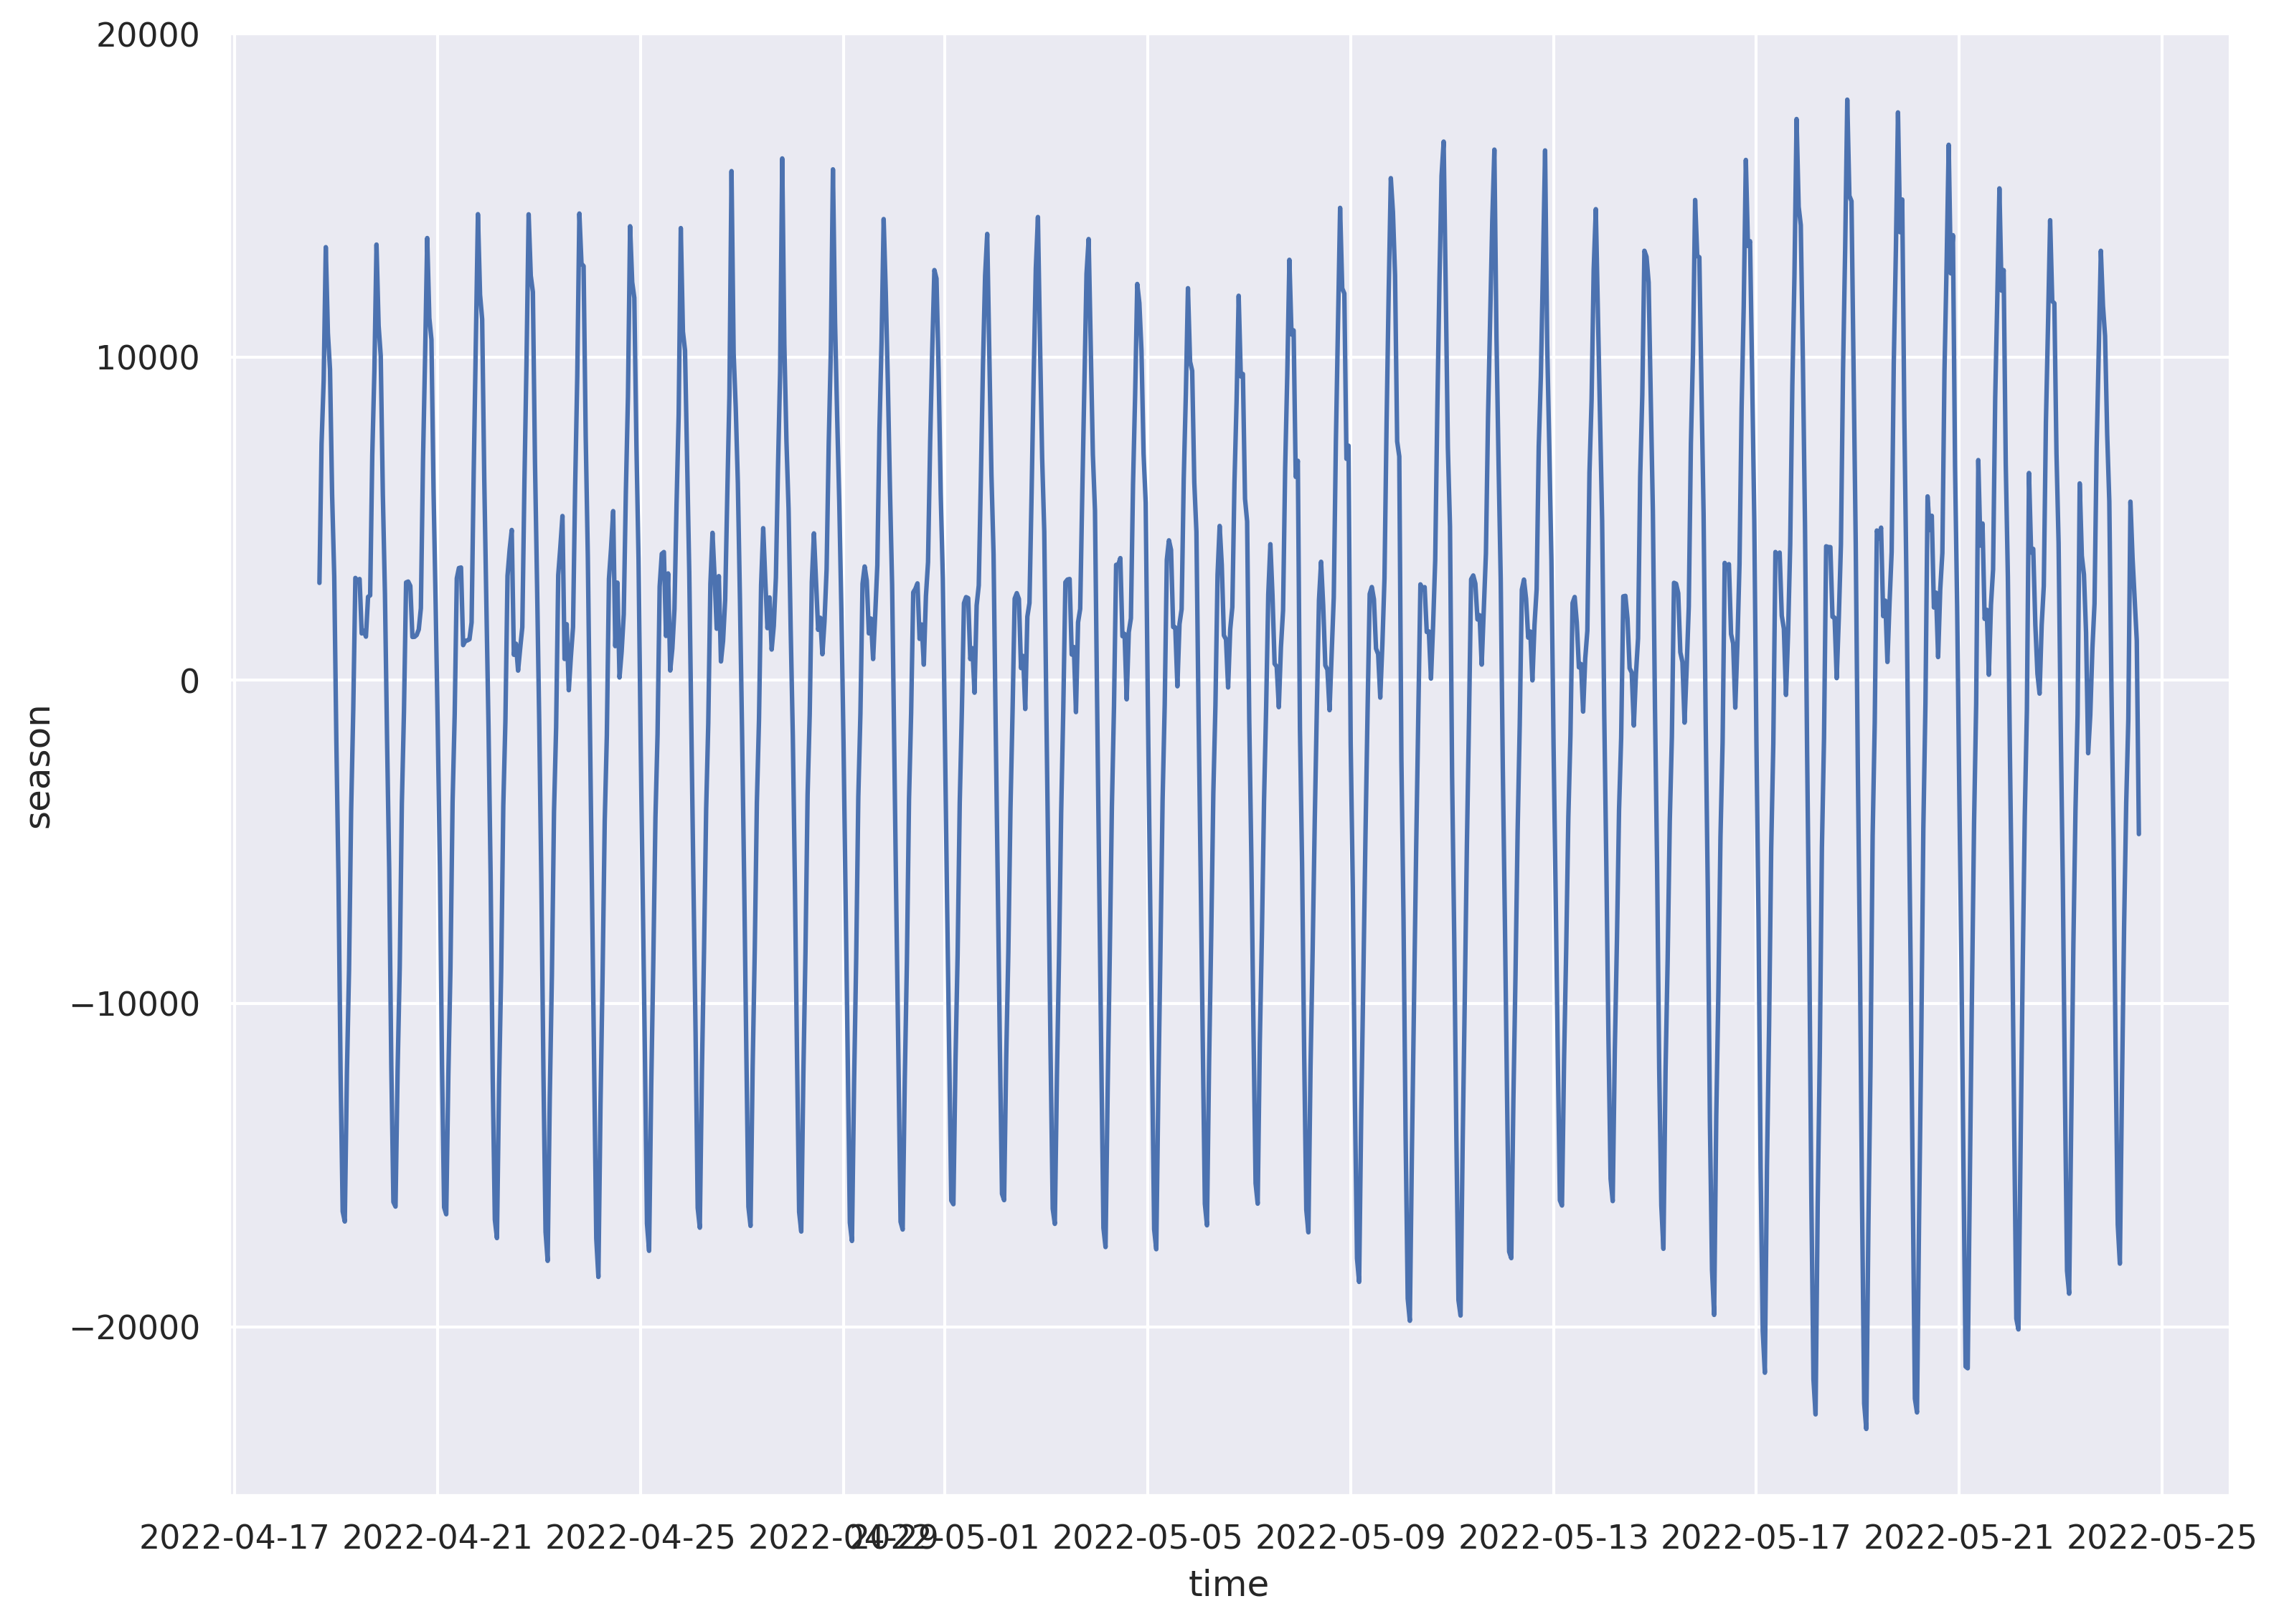

In [45]:
sns.lineplot(x=se.index, y=se)